In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import cv2
import pathlib

# Downloading the Dataset and Storing it in a Directory

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(fname='flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified '.' which means the current directory named 'datasets'
# untar=true will unzip it

In [3]:
type(data_dir), data_dir

(str, '.\\datasets\\flower_photos')

In [4]:
flower_dir = pathlib.Path(data_dir)
# When you convert data_dir to a pathlib.Path object,
# you gain the flexibility and power of the pathlib module to work with the file system
type(flower_dir), flower_dir

(pathlib.WindowsPath, WindowsPath('datasets/flower_photos'))

# File Paths of Images

In [5]:
flower_dir.glob('*/*.jpg')  # an object of paths of all images in each sub-dir

<generator object Path.glob at 0x0000020CDEBE1580>

In [6]:
flower_paths = list(flower_dir.glob('*/*.jpg'))
# turns an object into a list containing paths
flower_paths[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
flower_paths = {
    'roses': list(flower_dir.glob('roses/*.jpg')),
    'daisy': list(flower_dir.glob('daisy/*.jpg')),
    'dandelion': list(flower_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(flower_dir.glob('sunflowers/*.jpg')),
    'tulips': list(flower_dir.glob('tulips/*.jpg')),
}

In [8]:
for i in flower_paths.keys():
    print('{:<11}: {}'.format(i, len(flower_paths[i])))

roses      : 641
daisy      : 633
dandelion  : 898
sunflowers : 699
tulips     : 799


# Show Images

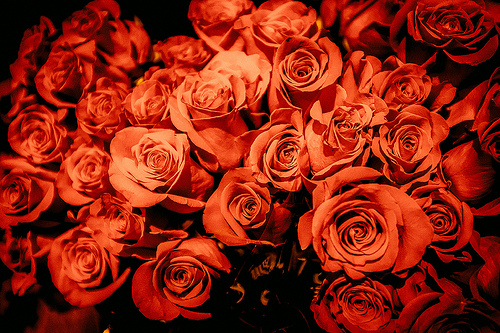

In [9]:
im = Image.open(str(flower_paths['roses'][2]))  # converts type from WindowsPath to str
im

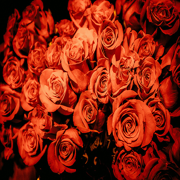

In [10]:
im.resize(size=(180, 180))

# Converting an Image into an Array

In [11]:
for i in flower_paths.keys():
    for j in range(2):
        print(cv2.imread(str(flower_paths[i][j])).shape)  # images have different shapes

(240, 179, 3)
(240, 320, 3)
(263, 320, 3)
(313, 500, 3)
(213, 320, 3)
(218, 320, 3)
(330, 500, 3)
(240, 320, 3)
(209, 320, 3)
(335, 500, 3)


In [12]:
labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
X = []  # contains arrays
Y = []  # contains types of flowers

for flower_type, paths in flower_paths.items():
    for path in paths:
        arr = cv2.imread(str(path))
        resized_arr = cv2.resize(arr, (180, 180))
        X.append(resized_arr)
        Y.append(labels[flower_type])

In [14]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((3670, 180, 180, 3), (3670,))

# Data Preprocessing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

In [16]:
X_train.shape, Y_train.shape

((3303, 180, 180, 3), (3303,))

In [17]:
X_test.shape, Y_test.shape

((367, 180, 180, 3), (367,))

In [18]:
values, counts = np.unique(Y_train, return_counts=True)
values, counts

(array([0, 1, 2, 3, 4]), array([577, 570, 808, 629, 719], dtype=int64))

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [20]:
np.max(X_train), np.max(X_train_scaled)

(255, 1.0)

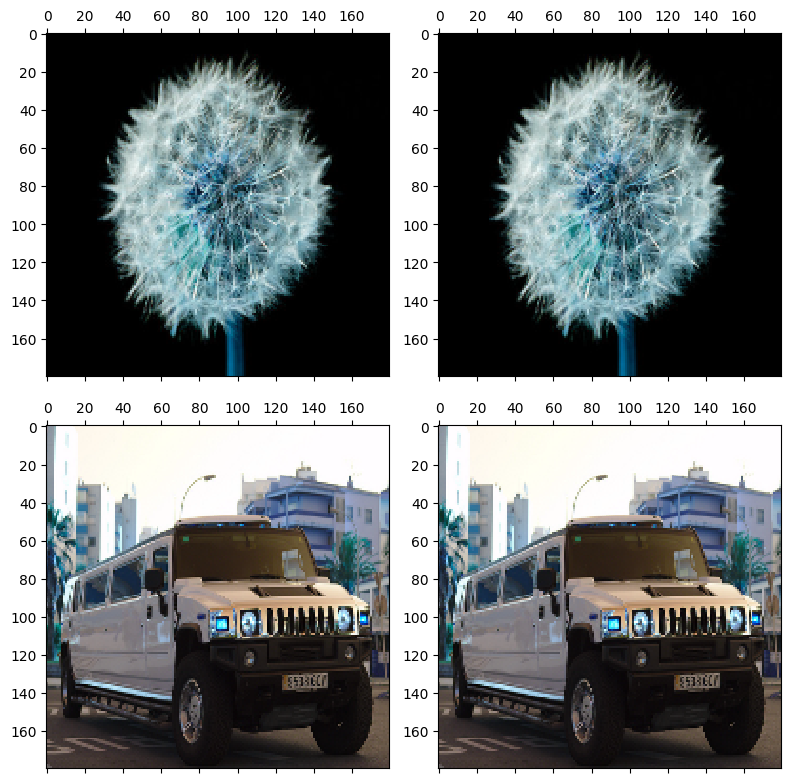

In [21]:
fig, subs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
sub1, sub2, sub3, sub4 = subs.flatten()

sub1.matshow(X_train[0])
sub2.matshow(X_train_scaled[0])
sub3.matshow(X_train[5])
sub4.matshow(X_train_scaled[5])

plt.tight_layout()

# Training without Data Augmentation

In [22]:
model = keras.Sequential([ x
    # CNN
    keras.layers.Input(shape=(180, 180, 3)),
    keras.layers.Conv2D(filters=18, kernel_size=(6, 6), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=36, kernel_size=(6, 6), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=72, kernel_size=(6, 6), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3741885079.py, line 1)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=20)

In [ ]:
model.evaluate(X_test_scaled, Y_test)

In [ ]:
proba_1 = model.predict(X_test_scaled)
Yp_test = np.array([np.argmax(i) for i in proba_1])
Yp_test.shape

In [ ]:
cm_1 = confusion_matrix(Y_test, Yp_test)
display_cm1 = ConfusionMatrixDisplay(cm_1, display_labels=list(labels.keys()))

display_cm1.plot()
plt.xlabel('Predicted label', fontsize=16, labelpad=20)
plt.ylabel('True label', fontsize=16, labelpad=20)

# Using Augmentation

### https://keras.io/api/layers/preprocessing_layers/

In [28]:
augmenter = keras.Sequential()
augmenter.add(keras.layers.RandomZoom(0.4))

In [29]:
augmented_tensor = augmenter(X_train_scaled)
augmented_tensor.shape

TensorShape([3303, 180, 180, 3])

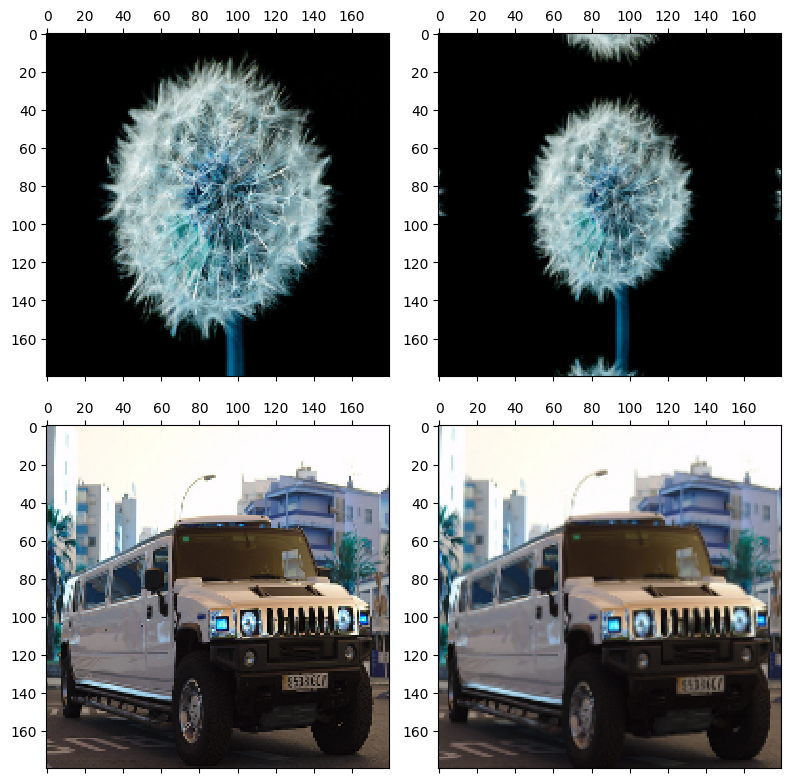

In [30]:
fig, subs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
sub1, sub2, sub3, sub4 = subs.flatten()

sub1.matshow(X_train_scaled[0])
sub2.matshow(augmented_tensor[0])
sub3.matshow(X_train_scaled[5])
sub4.matshow(augmented_tensor[5])

plt.tight_layout()